<AxesSubplot:>

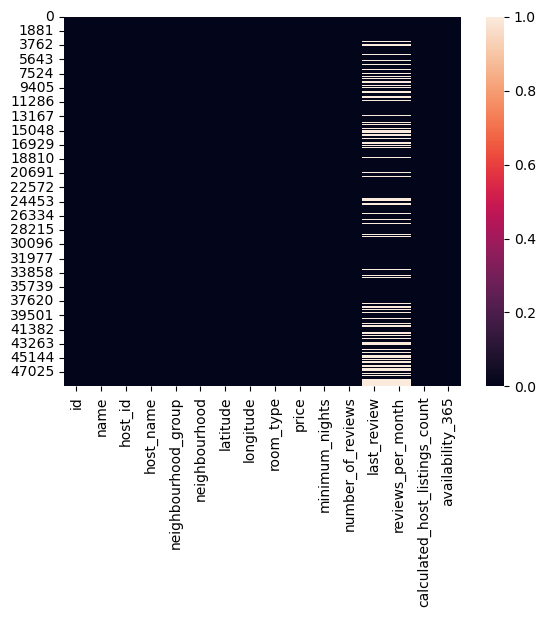

In [68]:
import requests
import json
import pandas as pd
import seaborn as sb

df = pd.read_csv("AirBNB.csv")
df

# Some uses for this dataset could be to utilize the locations of the Air BNB's to sort them by distance to a specified location.
# The name of the host can also be useful to automate emails to multiple hosts to reach out for appointments or general questions.

# This code creates the Seaborn heat map of the csv data
sns = sb
cols = df.columns
sns.heatmap(df[cols].isnull())


In [33]:
# This makes a copy of the dataframe from Pandas and drops the NaN values
df_2 = df.copy()
df_3 = df_2.dropna()

df_3


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [65]:
dates = df_3['last_review']
# print(dates)

# This code isolates the column containing the date of the most recent reviews and puts only the year into a list
years = []
for date in dates:
    current = date
    new = current[:4]
    years.append(new)
print(years)

# A list is made from the column containing the neighbourhood group and if the group is Manhattan, the respective name of the listing is put into a list
locations = df['neighbourhood_group']
# print(locations)
manhattan_only = []
for i in range(len(statuses)):
    pass
    if locations[i] == "Manhattan":
        print(df['name'][i])
print(private_only)


Skylit Midtown Castle
THE VILLAGE OF HARLEM....NEW YORK !
Entire Apt: Spacious Studio/Loft by central park
Large Cozy 1 BR Apartment In Midtown East
Large Furnished Room Near B'way
Cozy Clean Guest Room - Family Apt
Cute & Cozy Lower East Side 1 bdrm
Beautiful 1br on Upper West Side
Central Manhattan/near Broadway
Wonderful Guest Bedroom in Manhattan for SINGLES
West Village Nest - Superhost
Chelsea Perfect
Huge 2 BR Upper East  Cental Park
Magnifique Suite au N de Manhattan - vue Cloitres
Midtown Pied-a-terre
SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM
Modern 1 BR / NYC / EAST VILLAGE
front room/double bed
Spacious 1 bedroom in luxe building
back room/bunk beds
LowerEastSide apt share shortterm 1
ENJOY Downtown NYC!
West Side Retreat
BEST BET IN HARLEM
Cozy 1BD on Central Park West in New York City
Beautiful Apartment in Manhattan!!!
Great Location, Manhattan Bedroom!
Best Location in NYC! TIMES SQUARE!
**Bright Nolita Apt w Doorman/Elevators/Gym**
Sunny & Spacious Chelsea Apartment


In [94]:
import requests
import json

API_key = "f451285c21cfd9f434e65fd7b40e2488"
genius = requests.get(f"https://api.themoviedb.org/3/movie/550?api_key={API_key}")
json = genius.json()


# Returns a description of a movie given its id
def get_movie_byid(movie_id):
    API_key = "f451285c21cfd9f434e65fd7b40e2488"
    genius = requests.get(f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_key}&language=en-US")
    json = genius.json()
    return json['overview']

# Returns the credits for a movie given by id
def get_credits_byid(movie_id):
    API_key = "f451285c21cfd9f434e65fd7b40e2488"
    genius = requests.get(f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={API_key}&language=en-US")
    json = genius.json()
    name_list = []
    cast_info = json['cast']
    
    for i in range(len(cast_info)):
        name_list.append(cast_info[i]['name'])
    
    return(name_list)

# Returns a list of movies similar in genre to that of the movie associated with the input id
def similar_movies(movie_id):
    API_key = "f451285c21cfd9f434e65fd7b40e2488"
    genius = requests.get(f"https://api.themoviedb.org/3/movie/{movie_id}/similar?api_key={API_key}&language=en-US")
    json = genius.json()
    similar_list = []
    results = json['results']
    
    for i in range(len(results)):
        similar_list.append(results[i]['title'])
    
    return(similar_list)
    

['Alice in Wasteland',
 'The Big City',
 'Animal Love',
 'The Army Mascot',
 'Smoking / No Smoking',
 'She Does Not Drink, Smoke or Flirt But... She Talks',
 'Little Deaths',
 'The Night Watch',
 'Watchers 3',
 'You’re Missing the Point',
 'Never Say Goodbye',
 'Day of the Animals',
 'Red Dog',
 'Ghajini',
 'Something Beneath',
 'Mistress',
 'Lion Down',
 'Godmonster of Indian Flats',
 "Boog and Elliot's Midnight Bun Run",
 'Full Spead Ahead']